In [93]:
import time

import numpy as np
from sklearn.datasets import make_regression
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

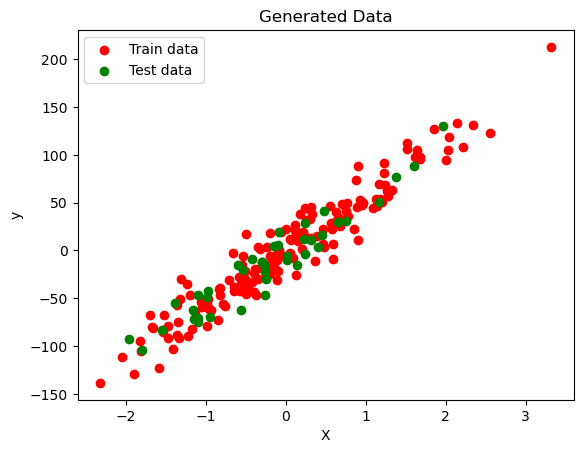

In [97]:
X, y = make_regression(n_samples=200, n_features=1, noise=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=254397)
plt.scatter(X_train, y_train, color='red', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

In [98]:
#Normalizacja
y_min = min(y_train)
y_max = max(y_train)
y_train = [(y_comp - y_min) / (y_max - y_min) for y_comp in y_train]

x_min = min(X_train)
x_max = max(X_train)
X_train = np.array([(x_comp - x_min) / (x_max - x_min) for x_comp in X_train])

Text(0, 0.5, 'Y')

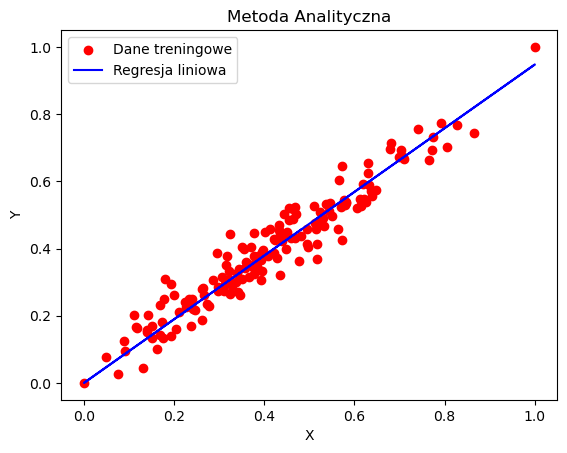

In [99]:
#Metoda analityczna
theta = (np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train)
y_pred = X_train @ theta
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.plot(X_train, y_pred, color='blue', label='Regresja liniowa')
plt.title('Metoda Analityczna')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')


Analityczna: [0.94775552], numeryczna: [0.94775552]


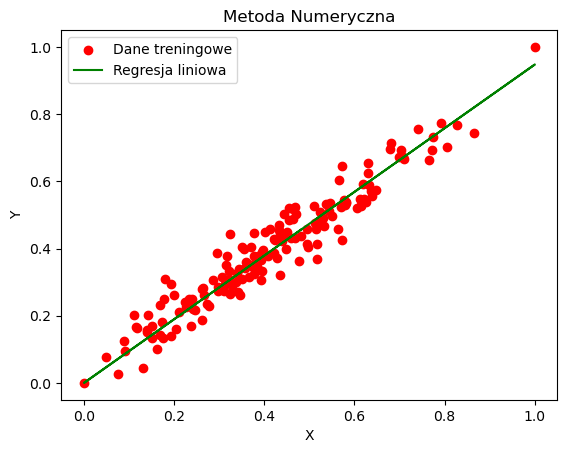

In [100]:
#Metoda numeryczna
def cost_function(teta, X, y):
    return 1/(len(X))*(y - X.T * teta) @ (y - X.T * teta).T
result = minimize(cost_function, x0=0, args=(X_train, y_train), method='Powell')
coeff = result.x
y_pred_powell = X_train.dot(coeff)
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.plot(X_train, y_pred_powell, color='green', label='Regresja liniowa')
plt.title('Metoda Numeryczna')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(f'Analityczna: {theta}, numeryczna: {coeff}')